In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
flat_df = pd.read_csv('data.csv')

In [5]:
flat_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,05/02/14,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,05/02/14,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,05/02/14,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,05/02/14,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,05/02/14,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
flat_df.shape

(4551, 18)

In [7]:
from datetime import datetime
import pandas as pd

date_str = "05/02/14"
date_obj = datetime.strptime(date_str, "%d/%m/%y")
int_date = int(date_obj.strftime("%y%m%d"))

flat_df['date'] = int_date

print(flat_df['date'])

0       140205
1       140205
2       140205
3       140205
4       140205
         ...  
4546    140205
4547    140205
4548    140205
4549    140205
4550    140205
Name: date, Length: 4551, dtype: int64


In [8]:
flat_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,140205,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,140205,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,140205,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,140205,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,140205,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
rounded_price = [round(value) for value in flat_df['price']]
flat_df['price'] = rounded_price

print(flat_df['price'])


0        313000
1       2384000
2        342000
3        420000
4        550000
         ...   
4546     308167
4547     534333
4548     416904
4549     203400
4550     220600
Name: price, Length: 4551, dtype: int64


In [10]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   int64  
 1   price          4551 non-null   int64  
 2   bedrooms       4551 non-null   int64  
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [11]:
flat_df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.0,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,140205.0,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,0.0,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,140205.0,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,140205.0,3.262645e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,140205.0,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,140205.0,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,140205.0,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [12]:
flat_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

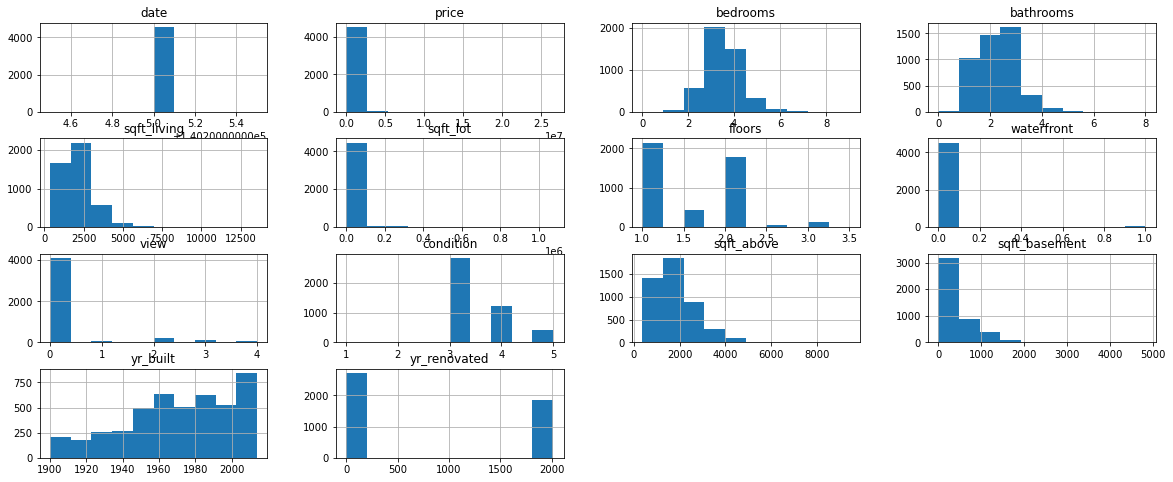

In [13]:
plt.rcParams['figure.figsize']=(20,8)
flat_df.hist()


In [14]:
X = flat_df.drop(columns=['view','street', 'yr_renovated','country', 'city','statezip', 'price'], axis=1)
Y = flat_df['price']


In [15]:
print(X)

        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     140205         3       1.50         1340      7912     1.5           0   
1     140205         5       2.50         3650      9050     2.0           0   
2     140205         3       2.00         1930     11947     1.0           0   
3     140205         3       2.25         2000      8030     1.0           0   
4     140205         4       2.50         1940     10500     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
4546  140205         3       1.75         1510      6360     1.0           0   
4547  140205         3       2.50         1460      7573     2.0           0   
4548  140205         3       2.50         3010      7014     2.0           0   
4549  140205         4       2.00         2090      6630     1.0           0   
4550  140205         3       2.50         1490      8102     2.0           0   

      condition  sqft_above  sqft_basem

In [16]:
print(Y)

0        313000
1       2384000
2        342000
3        420000
4        550000
         ...   
4546     308167
4547     534333
4548     416904
4549     203400
4550     220600
Name: price, Length: 4551, dtype: int64


In [17]:
flat_df['price'].value_counts()

300000     42
400000     31
600000     29
440000     29
450000     29
           ..
325900      1
684680      1
609900      1
1635000     1
220600      1
Name: price, Length: 1740, dtype: int64

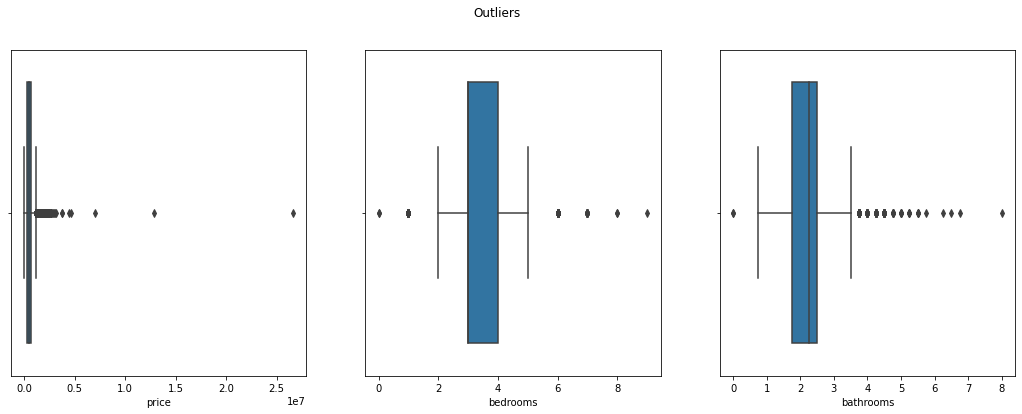

In [18]:
plt.rcParams['figure.figsize']=(18,6)
plt.suptitle('Outliers')

plt.subplot(1,3,1)
sns.boxplot(flat_df['price'])

plt.subplot(1,3,2)
sns.boxplot(flat_df['bedrooms'])

plt.subplot(1,3,3)
sns.boxplot(flat_df['bathrooms'])
plt.show()


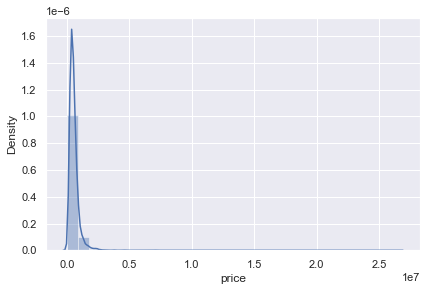

In [19]:
sns.set(rc={'figure.figsize':(6.7,4.27)})
sns.distplot(flat_df['price'], bins=30)
plt.show()


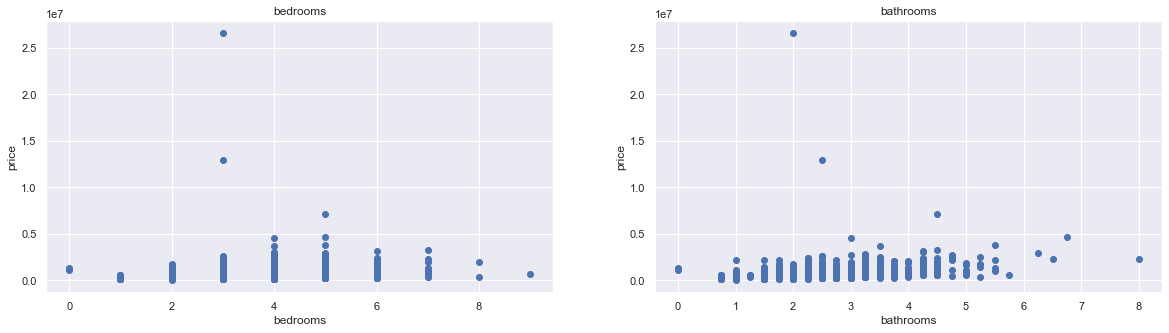

In [20]:
plt.figure(figsize=(20, 5))

features = ['bedrooms', 'bathrooms']
target = flat_df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = flat_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=72)

In [22]:
lin_reg_model = LinearRegression()

In [61]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [62]:
train_data_prediction = lin_reg_model.predict(X_train)

In [63]:
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.19565063220204137


In [64]:
test_data_prediction = lin_reg_model.predict(X_test)

In [65]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6053319495151033


In [28]:
decision_tree = DecisionTreeRegressor()

In [29]:
decision_tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [30]:
train_data_prediction = decision_tree.predict(X_train)

In [31]:
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9999990573626687


In [32]:
test_data_prediction = decision_tree.predict(X_test)

In [33]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3302155850908126


In [34]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)
rftrain_data_prediction = rf_regressor.predict(X_train)

In [35]:
error_score = metrics.r2_score(Y_train, rftrain_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8670711748621267


In [36]:
rftest_data_prediction = rf_regressor.predict(X_test)

In [37]:
error_score = metrics.r2_score(Y_test, rftest_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4508704782348735


In [38]:
gb_regressor = GradientBoostingRegressor()

In [39]:
gb_regressor.fit(X_train, Y_train)

GradientBoostingRegressor()

In [40]:
gdtrain_data_prediction = gb_regressor.predict(X_train)

In [41]:
error_score = metrics.r2_score(Y_train, gdtrain_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7058578917473651


In [42]:
gdtest_data_prediction = gb_regressor.predict(X_test)

In [43]:
error_score = metrics.r2_score(Y_test, gdtest_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5557093608445387


In [44]:
flat_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,140205,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,140205,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,140205,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,140205,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,140205,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [45]:
X = np.asarray(X)
Y = np.asarray(Y)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
models = [LinearRegression(), RandomForestRegressor(random_state=0), GradientBoostingRegressor()]

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [50]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression() = [0.58051053 0.56168407 0.61811954 0.55881906 0.04398797]
Acccuracy score of the  LinearRegression() = 47.26 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=0) = [ 0.08482472  0.48645922 -0.35165627  0.22092549  0.05005579]
Acccuracy score of the  RandomForestRegressor(random_state=0) = 9.81 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor() = [ 0.39638308 -1.10546718  0.563824    0.50644947  0.04955238]
Acccuracy score of the  GradientBoostingRegressor() = 8.21 %
---------------------------------------------------------------


In [51]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [52]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression() = [0.58051053 0.56168407 0.61811954 0.55881906 0.04398797]
Acccuracy score of the  LinearRegression() = 47.26 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=0) = [ 0.08482472  0.48645922 -0.35165627  0.22092549  0.05005579]
Acccuracy score of the  RandomForestRegressor(random_state=0) = 9.81 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor() = [ 0.41181371 -1.11067718  0.56705244  0.50939799  0.04947242]
Acccuracy score of the  GradientBoostingRegressor() = 8.54 %
---------------------------------------------------------------


In [70]:
import pickle 
pickle.dump(lin_reg_model,open('model.pkl','wb'))

In [69]:
lin_reg_model.predict(np.array([140205, 3, 1.50, 1340, 7912, 1.5, 0, 3, 1340, 0, 1955]).reshape(1,11))

array([350970.35164993])

LinearRegression model is the highest accuracy